# Viral Infection Prediction

In this mini project, I have collected the dataset (from Kaggle) and I will be using Machine Learning to predict whether a person is suffering from viral infection or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

## Reading dataset
We are reading dataset.csv downloaded from Kaggle.

In [2]:
rd = pd.read_csv('dataset.csv')

## Algorithm
Here we will be importing KNeighborsClassifier and will use its algorithm later in the code.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

The dataset is as follows:

In [4]:
rd

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,viral
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Description of Dataset
Contains the mean, maximum, etc. of every column variable. It is used to give a generalized values of all the columns.

In [5]:
rd.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,viral
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'viral'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

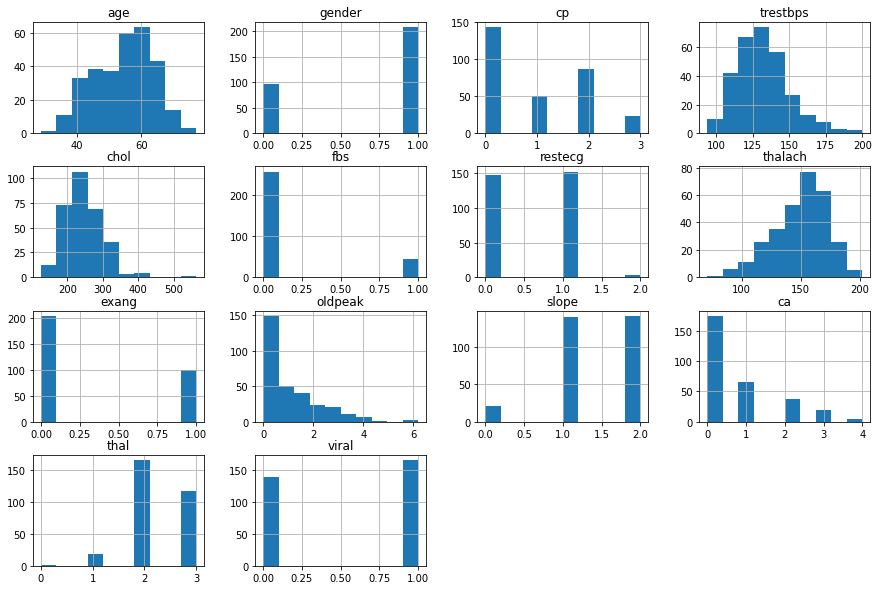

In [6]:
mpl.rcParams['figure.figsize']=15 , 10
rd.hist()


## Correlation of Various Columns

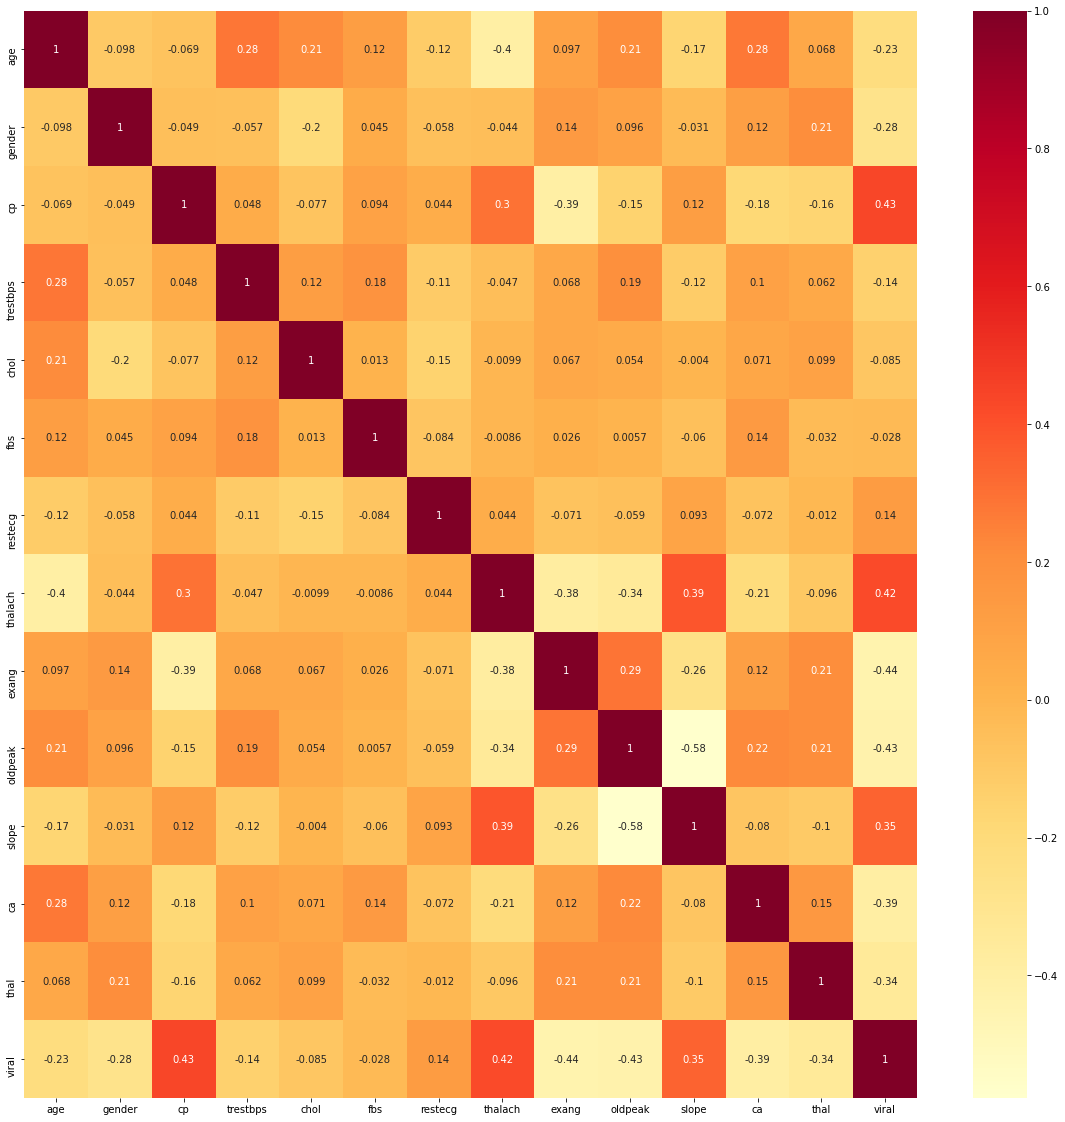

In [7]:
#get correlations of each features in dataset
findCorr = rd.corr()
corrFeatures = findCorr.index
mpl.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(rd[corrFeatures].corr(),annot=True,cmap="YlOrRd")

## Balanced dataset
It's always a good practice to work with a dataset where the TARGET classes are of approximately equal size. So let us check if our viral is balanced or not.

<AxesSubplot:xlabel='viral', ylabel='count'>

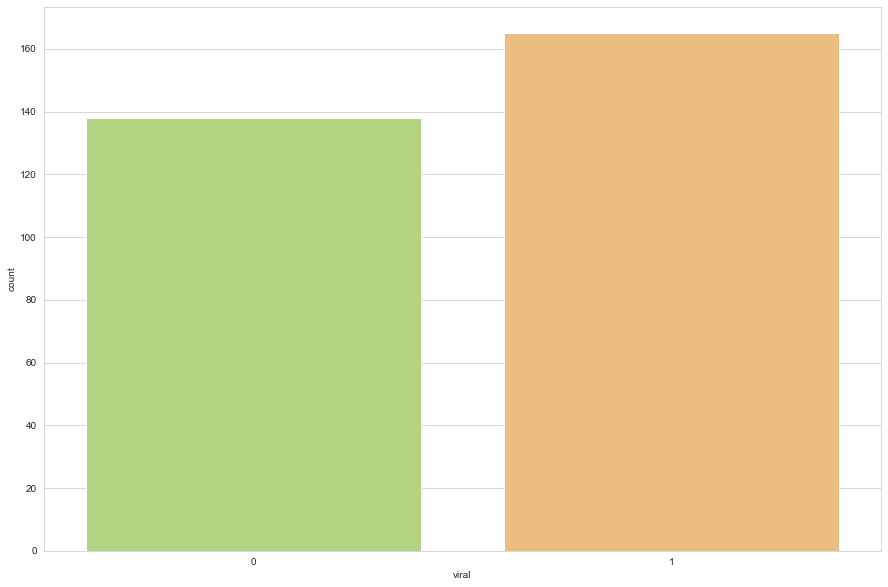

In [8]:
sb.set_style('whitegrid')
sb.countplot(x='viral',data=rd,palette='RdYlGn_r')

## Data Processing

Now, we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, we will use the `get_dummies` method to create dummy columns for categorical variables.

In [9]:
dataset = pd.get_dummies(rd, columns = ['gender', 'cp', 'slope', 'restecg', 'fbs', 'thal', 'exang', 'ca'])

## Using Standard Scaler
Next, we will be using StandardScaler() library to scale down values based on standard normal distribution.

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scale = ['age', 'chol', 'thalach', 'trestbps', 'oldpeak']
dataset[scale] = ss.fit_transform(dataset[scale])

## Improved Table
Contains new dummy variable columns created from the categorical features and rescaled down columns based on standard normal distribution.

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,viral,gender_0,gender_1,cp_0,cp_1,...,thal_1,thal_2,thal_3,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,0,1,0,1,0,1,0,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0


In [12]:
y = dataset['viral']
x = dataset.drop(['viral' ,'restecg_0' ], axis = 'columns')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   gender_0   303 non-null    uint8  
 6   gender_1   303 non-null    uint8  
 7   cp_0       303 non-null    uint8  
 8   cp_1       303 non-null    uint8  
 9   cp_2       303 non-null    uint8  
 10  cp_3       303 non-null    uint8  
 11  slope_0    303 non-null    uint8  
 12  slope_1    303 non-null    uint8  
 13  slope_2    303 non-null    uint8  
 14  restecg_1  303 non-null    uint8  
 15  restecg_2  303 non-null    uint8  
 16  fbs_0      303 non-null    uint8  
 17  fbs_1      303 non-null    uint8  
 18  thal_0     303 non-null    uint8  
 19  thal_1     303 non-null    uint8  
 20  thal_2    

## Applying KNN Algorithm
Now, we will be training the machine learning model with the help of k nearest neighbour algorithm and cross validation.

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

## Plotting Graph
Now we will plot a graph for K Neighbours classifier scores for different K values.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

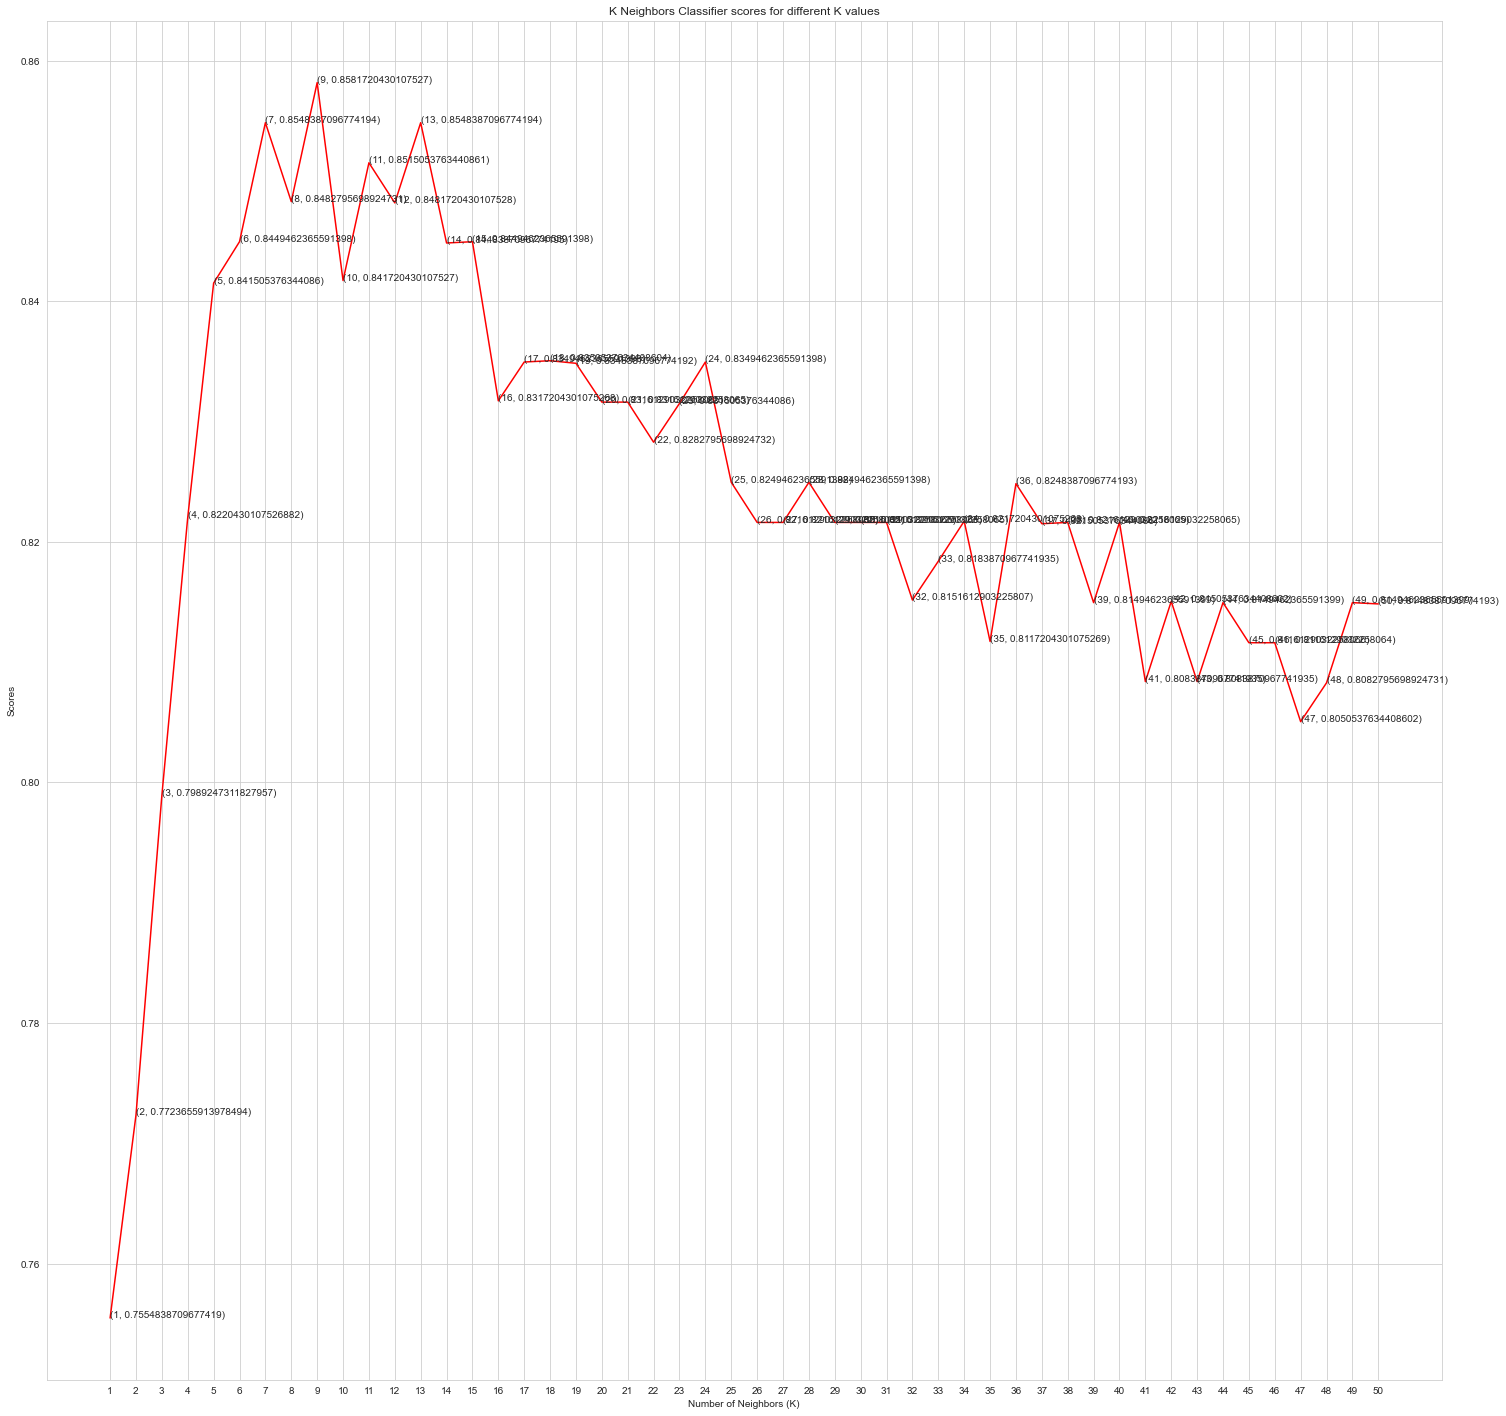

In [14]:
mpl.rcParams['figure.figsize']=25 , 25
mpl.plot([k for k in range(1, 51)], knn_scores, color = 'red')
for i in range(1,51):
    mpl.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
mpl.xticks([i for i in range(1, 51)])
mpl.xlabel('Number of Neighbors (K)')
mpl.ylabel('Scores')
mpl.title('K Neighbors Classifier scores for different K values')

## Choosing the optimal value
We choose the optimal k value, which is going to be the value having highest y-coordinate (accuracy) in the graph.

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
score=cross_val_score(knn_classifier,x,y,cv=10)

## Accuracy
Let's see the final accuracy of the system.

In [16]:
score.mean()

0.8581720430107527